In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
!git clone https://github.com/rezashokrzad/Dataset.git

Cloning into 'Dataset'...
remote: Enumerating objects: 22, done.
remote: Total 22 (delta 0), reused 0 (delta 0), pack-reused 22
Receiving objects: 100% (22/22), 22.29 MiB | 10.91 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [4]:
df = pd.read_csv('/content/Dataset/data-ETHUSD-H1-MACD_train.csv')
df.head()

,Timestamp,Open,Close,Min,Max,Volume,VolumeQuote,12 Day EMA,26 Day EMA,MACD,Signal,Histogram,12 Day EMA/close,26 Day EMA/close
0,2017-05-07T00:00:00.000Z,95.20,94.93,94.41,96.47,0.842,80.31584,94.658717,91.495411,3.163307,3.896197,-0.732890,0.997142,0.963820
1,2017-05-07T01:00:00.000Z,94.94,94.21,93.78,95.79,0.863,81.85977,94.589684,91.696491,2.893193,3.695596,-0.802403,1.004030,0.973320
2,2017-05-07T02:00:00.000Z,94.24,93.77,93.40,95.64,0.834,78.78455,94.463579,91.850085,2.613494,3.479175,-0.865681,1.007397,0.979525
3,2017-05-07T03:00:00.000Z,93.74,95.28,93.74,95.34,0.833,78.76050,94.589182,92.104152,2.485030,3.280346,-0.795317,0.992750,0.966668
4,2017-05-07T04:00:00.000Z,94.04,93.77,93.28,95.04,0.914,85.95975,94.463154,92.227549,2.235605,3.071398,-0.835793,1.007392,0.983551


In [7]:
df.shape
data = df.values[:, 9:].astype(np.float32)
#label
label = df.values[:, 2].astype(np.float32)

(29999, 14)

In [8]:
k = 5 #supervising time
N = np.size(data , axis=0)
winSize = 20 #the size of sliding window
f = 5 #the number of features
X = np.zeros((0,winSize * f))
Ytr_c = np.zeros((0,1))

for i in tqdm(range(N - winSize - k)):
  X = np.concatenate((X  , data[i: i + winSize].flatten().reshape(1,-1)) , axis = 0)

  if label[i+winSize + k] / label[i+winSize] >= 1.01:
    Ytr_c = np.concatenate((Ytr_c , np.array(+1).reshape(-1,1)) , axis = 0)
  elif label[i+winSize + k] / label[i+winSize] <= 0.99:
    Ytr_c = np.concatenate((Ytr_c , np.array(-1).reshape(-1,1)) , axis = 0)
  else:
    Ytr_c = np.concatenate((Ytr_c , np.array(0).reshape(-1,1)) , axis = 0)

  0%|          | 0/29974 [00:00<?, ?it/s]

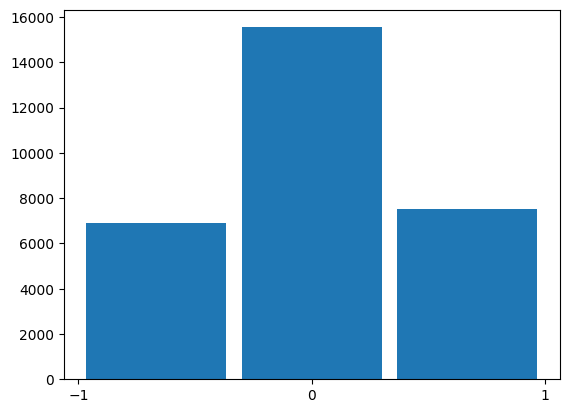

In [9]:
plt.hist(Ytr_c, bins=3, rwidth=0.9)
plt.xticks([-1, 0, 1]);

In [10]:
#same process for preparing test data
df = pd.read_csv('Dataset/data-ETHUSD-H1-MACD_test.csv')
df.head()
data = df.values[:, 9:].astype(np.float32)
label = df.values[:, 2].astype(np.float32)

Nts = np.size(data , axis=0)
Xts = np.zeros((0,winSize * f))
Yts_c = np.zeros((0,1))


for i in tqdm(range(Nts - winSize - k)):
  Xts = np.concatenate((Xts  , data[i: i + winSize].flatten().reshape(1,-1)) , axis = 0)

  if label[i+winSize + k] / label[i+winSize] >= 1.01:
    Yts_c = np.concatenate((Yts_c , np.array(+1).reshape(-1,1)) , axis = 0)
  elif label[i+winSize + k] / label[i+winSize] <= 0.99:
    Yts_c = np.concatenate((Yts_c , np.array(-1).reshape(-1,1)) , axis = 0)
  else:
    Yts_c = np.concatenate((Yts_c , np.array(0).reshape(-1,1)) , axis = 0)

Nts = np.size(Xts , axis=0)

  0%|          | 0/5625 [00:00<?, ?it/s]

In [11]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X , Ytr_c[:,0])
Yp = tree.predict(Xts)

In [12]:
print(accuracy_score(Yts_c , Yp))

0.424
